In [1]:
#Demonstration
import math
    
def decoratorlog(f):
    def wrapper(*args):
        result =  f(*args)
        print(f"{f.__name__} de {args} est: {result}") 
        return result
    return wrapper

In [2]:
def createDataSet(*args):
    # A People with Age 0 -> young 1 -> old, Income low -> 0 high -> 1
    dataSet = [[0, 0, 'no buy'],  # young, low income
               [1, 1, 'buy'],    # old, high income
               [0, 1, 'buy'],    # young, high income
               [1, 1, 'buy'],    # old, high income
               [0, 0, 'no buy'], # young, low income
               [1, 1, 'buy'],    # old, high income
               [1, 0, 'buy'], # old, low income
               [0, 0, 'no buy'], # young, low income
               [0, 0, 'no buy'], # young, low income
               [1, 1, 'buy']]    # old, high income
    
    # Labels represent the feature names for Age and Income
    labels = ['Age', 'Income']
    
    return dataSet, labels

dataSet, labels = createDataSet()

# Output the new dataset
print("Dataset:", dataSet)
print("Labels:", labels)


Dataset: [[0, 0, 'no buy'], [1, 1, 'buy'], [0, 1, 'buy'], [1, 1, 'buy'], [0, 0, 'no buy'], [1, 1, 'buy'], [1, 0, 'buy'], [0, 0, 'no buy'], [0, 0, 'no buy'], [1, 1, 'buy']]
Labels: ['Age', 'Income']


In [3]:
from math import log
#@decoratorlog
def calcShannonEnt(dataSet):
     numEntries = len(dataSet)
     labelCounts = {}
     for featVec in dataSet: 
         currentLabel = featVec[-1] 
         if currentLabel not in labelCounts.keys():
             labelCounts[currentLabel] = 0 
         labelCounts[currentLabel] += 1 
     shannonEnt = 0.0
     for key in labelCounts:
         prob = float(labelCounts[key])/numEntries
         shannonEnt -= prob * log(prob,2) 
     return shannonEnt
    
calcShannonEnt(dataSet)

0.9709505944546686

In [4]:
#Splitting Dataset
#@decoratorlog
def splitDataSet(dataSet, axis, value):
    retDataset =[]
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataset.append(reducedFeatVec)
    return retDataset
dataSet, labels = createDataSet()
splitDataSet(dataSet, 0, 1)
splitDataSet(dataSet, 0, 0)
splitDataSet(dataSet, 1, 0)
splitDataSet(dataSet, 1, 1)

[[1, 'buy'], [0, 'buy'], [1, 'buy'], [1, 'buy'], [1, 'buy']]

In [5]:
dataSet, labels = createDataSet()
print(dataSet[0])
print(labels)
@decoratorlog
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList) 
        newEntropy = 0.0
        for value in uniqueVals:
            subDataset = splitDataSet(dataSet, i, value)
            prob = len(subDataset) / float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataset)
        infoGain = baseEntropy - newEntropy 
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain 
            bestFeature = i 
    return bestFeature 

chooseBestFeatureToSplit(dataSet)   
    
    

[0, 0, 'no buy']
['Age', 'Income']
chooseBestFeatureToSplit de ([[0, 0, 'no buy'], [1, 1, 'buy'], [0, 1, 'buy'], [1, 1, 'buy'], [0, 0, 'no buy'], [1, 1, 'buy'], [1, 0, 'buy'], [0, 0, 'no buy'], [0, 0, 'no buy'], [1, 1, 'buy']],) est: 0


0

In [6]:
import operator
#@decoratorlog
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]
    
majorityCnt(['yes', 'yes', 'no'])
majorityCnt(['yes', 'yes', 'no','no','maybe'])
majorityCnt(['yes', 'yes', 'no','no','no'])

'no'

In [7]:
#@decoratorlog
def createTree(dataSet, labels):
     classList = [example[-1] for example in dataSet]
     if classList.count(classList[0]) == len(classList):
         return classList[0] 
     if len(dataSet[0]) == 1: 
         return majorityCnt(classList) 
     bestFeat = chooseBestFeatureToSplit(dataSet)
     bestFeatLabel = labels[bestFeat]
     myTree = {bestFeatLabel:{}}
     del(labels[bestFeat]) 
     featValues = [example[bestFeat] for example in dataSet] 
     uniqueVals = set(featValues) 
     for value in uniqueVals:
         subLabels = labels[:] 
         myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value),subLabels)
     return myTree
dataSet, labels = createDataSet()
createTree(dataSet, labels)


chooseBestFeatureToSplit de ([[0, 0, 'no buy'], [1, 1, 'buy'], [0, 1, 'buy'], [1, 1, 'buy'], [0, 0, 'no buy'], [1, 1, 'buy'], [1, 0, 'buy'], [0, 0, 'no buy'], [0, 0, 'no buy'], [1, 1, 'buy']],) est: 0
chooseBestFeatureToSplit de ([[0, 'no buy'], [1, 'buy'], [0, 'no buy'], [0, 'no buy'], [0, 'no buy']],) est: 0


{'Age': {0: {'Income': {0: 'no buy', 1: 'buy'}}, 1: 'buy'}}

In [8]:
dataSet, labels = createDataSet()
label_input = labels[:]
tree = createTree(dataSet, label_input)

#@decoratorlog
def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr) 
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__=='dict':
                classLabel = classify(secondDict[key],featLabels,testVec)
            else: classLabel = secondDict[key]
    return classLabel
classify(tree, labels, [1, 0])

chooseBestFeatureToSplit de ([[0, 0, 'no buy'], [1, 1, 'buy'], [0, 1, 'buy'], [1, 1, 'buy'], [0, 0, 'no buy'], [1, 1, 'buy'], [1, 0, 'buy'], [0, 0, 'no buy'], [0, 0, 'no buy'], [1, 1, 'buy']],) est: 0
chooseBestFeatureToSplit de ([[0, 'no buy'], [1, 'buy'], [0, 'no buy'], [0, 'no buy'], [0, 'no buy']],) est: 0


'buy'

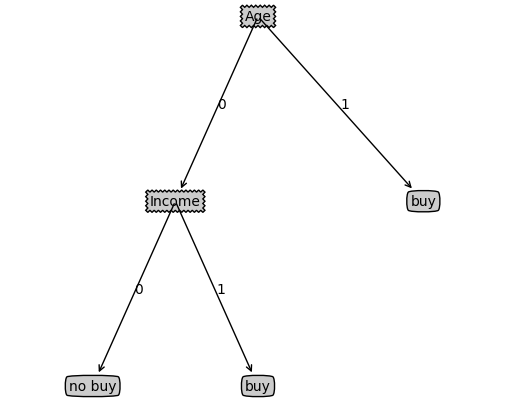

In [9]:
import matplotlib.pyplot as plt

# Définition des styles de boîtes
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

# Dessiner une flèche avec texte entre deux boîtes
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    plt.text(xMid, yMid, txtString)

# Dessiner un nœud (décision ou feuille)
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    plt.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction',
                 xytext=centerPt, textcoords='axes fraction',
                 va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)

# Compter les feuilles
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict:
        if isinstance(secondDict[key], dict):
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

# Calculer profondeur
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict:
        if isinstance(secondDict[key], dict):
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

# Initialisation du tracé global
def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW,
              plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict:
        if isinstance(secondDict[key], dict):
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff),
                     cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD

# Fonction principale pour afficher un arbre
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()
    
createPlot(tree)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Original dataset
dataSet, labels = createDataSet()

# Split data into features (X) and target (y)
X = [row[:-1] for row in dataSet]  # features
y = [row[-1] for row in dataSet]  # target labels

# Train a decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

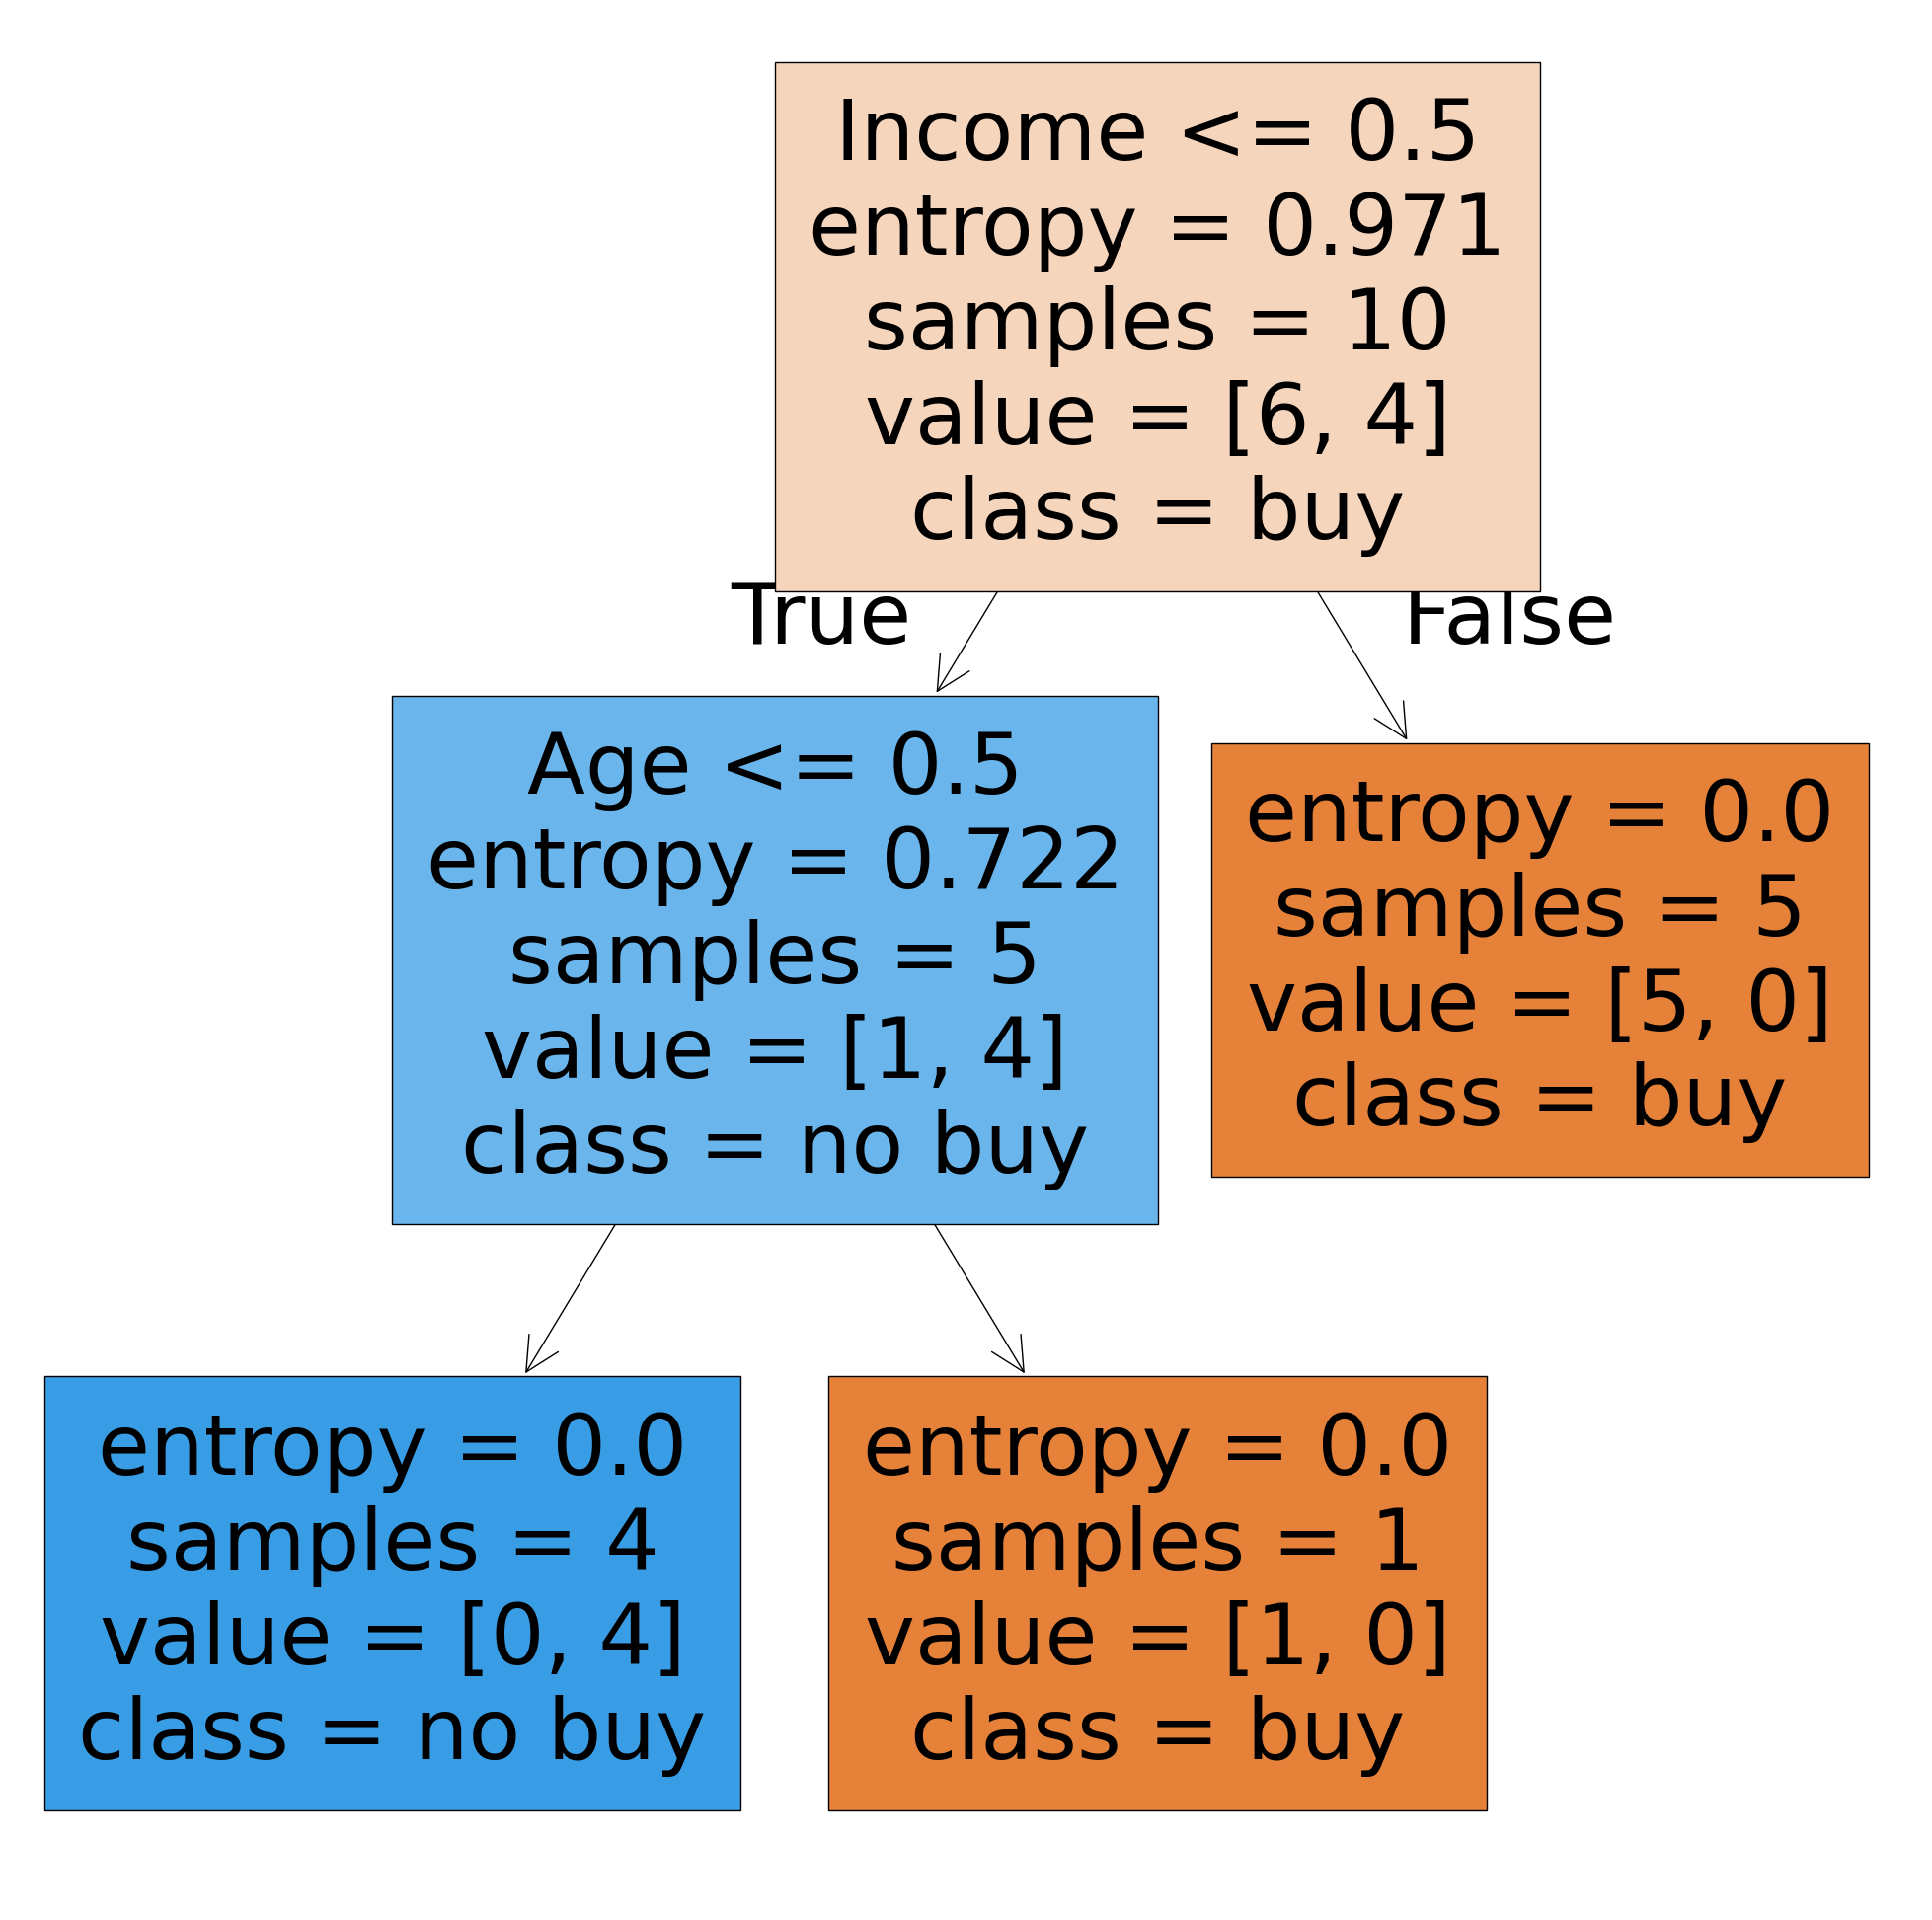

In [11]:
# Visualize the tree
plt.figure(figsize=(25,25))
tree.plot_tree(clf, feature_names=labels, class_names=clf.classes_, filled=True)
plt.show()

In [12]:
print(clf.predict([[1, 0]]))
print(clf.predict([[0, 0]]))
print(clf.predict([[0, 1]]))
print(clf.predict([[1, 1]]))

['buy']
['no buy']
['buy']
['buy']


In [16]:
import pickle
def storeTree(inputTree, filename):
     fw = open(filename,'wb')
     pickle.dump(inputTree, fw)
     fw.close()
 
def grabTree(filename):
    fr = open(filename, 'rb')
    tree = pickle.load(fr)
    fr.close()
    return tree

In [17]:
storeTree(clf, 'decision_tree_model.pkl')

tree_clf_loaded = grabTree( 'decision_tree_model.pkl')

print(tree_clf_loaded.predict([[1, 0]]))

['buy']
